In [42]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns 

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ak@10042002',
    database='ecommerce'
)
cur = db.cursor()

In [157]:
query = "SELECT DISTINCT customer_city FROM customers ORDER BY customer_city"
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,abadia dos dourados
1,abadiania
2,abaete
3,abaetetuba
4,abaiara


# List all unique cities where customers are located.


In [145]:
query = "select COUNT(order_purchase_timestamp) from ecommerce.orders WHERE YEAR(order_purchase_timestamp) = 2017;"
cur.execute(query)
data = cur.fetchall()
data[0][0]

45101

# Count the number of orders placed in 2017.

In [147]:
query = "select COUNT(order_purchase_timestamp) from orders WHERE YEAR(order_purchase_timestamp) = 2017;"
cur.execute(query)
data = cur.fetchall()
data[0][0]

45101

# Find the total sales per category.

In [84]:
query = """SELECT products.product_category as Category, ROUND(SUM(payments.payment_value),2) as Sales FROM products JOIN order_items
ON products.product_id = order_items.product_id
join payments
ON payments.order_id = order_items.order_id
GROUP by Category
ORDER BY Category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns = ["Category", "Sales"])
df

,Category,Sales
0,None,252801.71
1,Agro Industria e Comercio,118730.61
2,Art,30992.93
3,Arts and Crafts,2326.17
4,audio,60324.62
...,...,...
69,stationary store,317440.07
70,technical books,24915.44
71,telephony,486882.05
72,toys,619037.69


#  Calculate the percentage of orders that were paid in installments.

In [100]:
query = """ SELECT (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100  FROM ecommerce.payments"""
cur.execute(query)
data = cur.fetchall()
"percentage of orders that were paid in installments = ", data[0][0]

('percentage of orders that were paid in installments = ', Decimal('99.9981'))

# count the number of customers from each state. 

<function matplotlib.pyplot.show(close=None, block=None)>

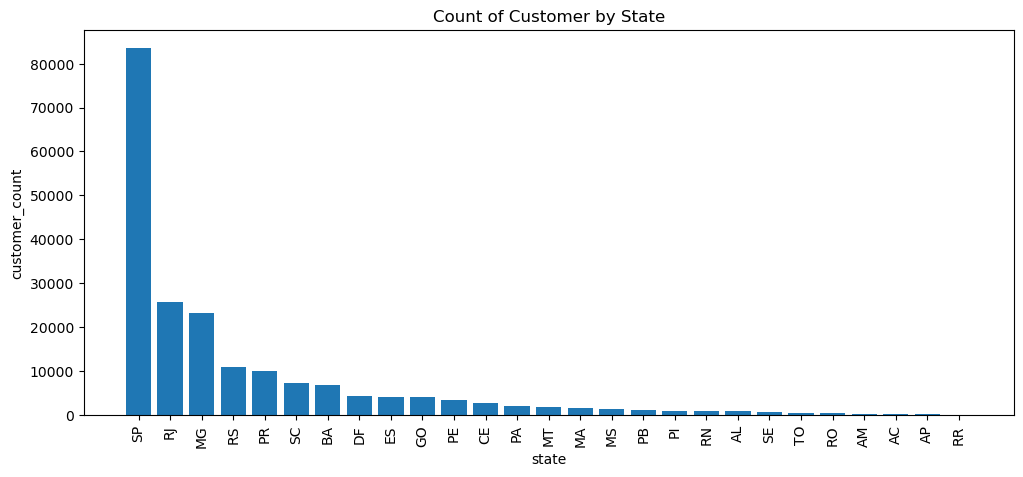

In [169]:
query = """ SELECT customer_state, COUNT(customer_id) FROM customers group by customer_state
order by customer_state"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["state" , "customer_count"])
df = df.sort_values(by = "customer_count" , ascending = False)

plt.figure(figsize = (12,5))
plt.bar(df["state"] , df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("state")
plt.ylabel("customer_count")
plt.title("Count of Customer by State")
plt.show